<a href="https://colab.research.google.com/github/ashhwiithac22/Deep-Learning-Experiments/blob/main/DL_Ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving download.jpg to download.jpg


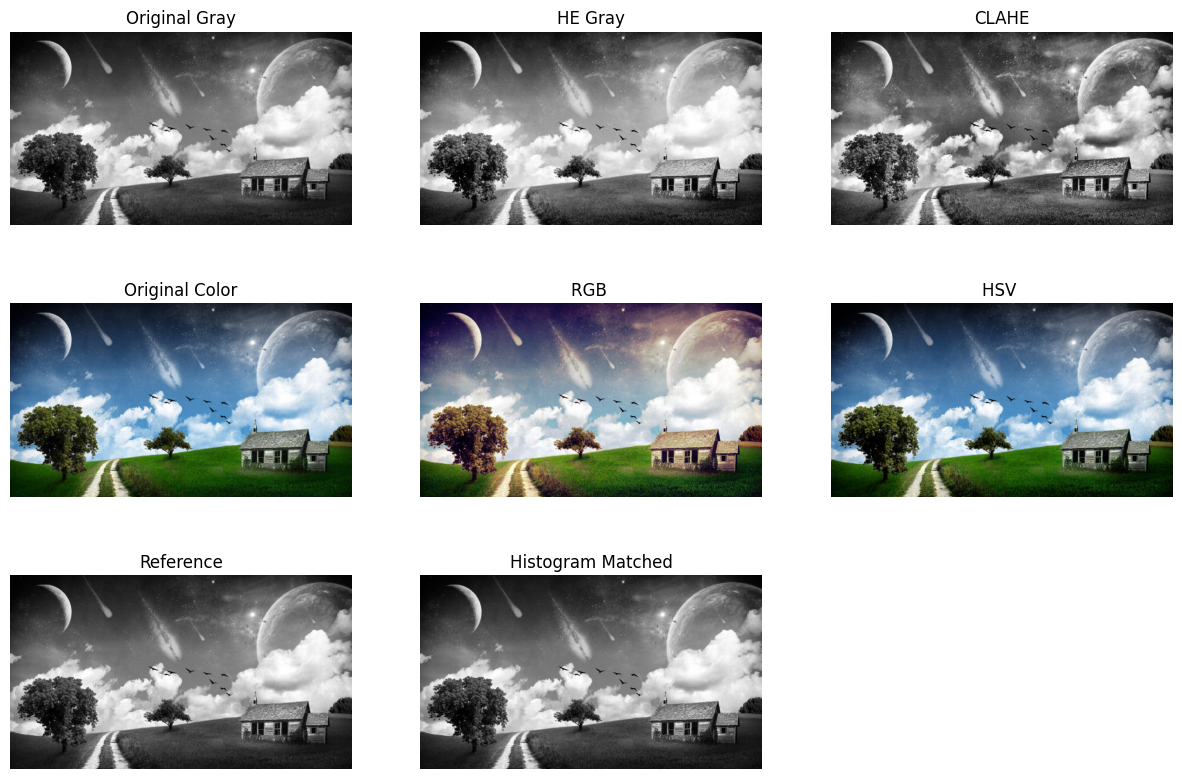

In [ ]:
import cv2 #open CV library
import numpy as np #used to work with arrays and numbers
import matplotlib.pyplot as plt #used to display plots
from google.colab import files #allows user to upload images to google colab


uploaded = files.upload() #opens an upload window
filename = list(uploaded.keys())[0] #gets the name of the uploded file

img = cv2.imread(filename) #reads the uploaded image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converts color image to gray used for histogram equalization
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert bgr to rgb

gray_hist = cv2.equalizeHist(gray) #improves the contrast of the gray scale image, without histogram the image may look too dark or too bright, low contrast
b, g, r = cv2.split(img) # Split BGR image into Blue, Green, and Red channels

b_hist = cv2.equalizeHist(b) #Improves contrast of Blue channel
g_hist = cv2.equalizeHist(g) #Improves contrast of green channel
r_hist = cv2.equalizeHist(r) #Improves contrast of red channel
rgb_hist = cv2.merge((b_hist, g_hist, r_hist)) #merge the enhanced B, G, R channels
rgb_hist = cv2.cvtColor(rgb_hist, cv2.COLOR_BGR2RGB)

#HSV - hue saturation value, In HSV, we can modify the V (Value) channel to adjust brightness or contrast without changing the actual color (Hue).
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

v_hist = cv2.equalizeHist(v) #improves the contrast of the brightness (V) channnel
hsv_hist = cv2.merge((h, s, v_hist))
hsv_hist = cv2.cvtColor(hsv_hist, cv2.COLOR_HSV2RGB) #converts the HSV format to RGB format


reference = gray // 2 #used to create a darker version of image
matched = np.zeros_like(gray) #creates a new image as same height and width of gray image all starting values from 0
for i in range(256):
    matched[gray == i] = i * np.mean(reference) / np.mean(gray)
matched = np.clip(matched, 0, 255).astype(np.uint8) # keeps pixel values between 0 and 255

clahe = cv2.createCLAHE(2.0, (8,8)) #Contrast Limited Adaptive Histogram Equalization, CLAHE improves image contrast by applying histogram equalization on small regions while limiting brightness to avoid noise.
gray_clahe = clahe.apply(gray)  #applying clahe to gray scale image

plt.figure(figsize=(15,10))
plt.subplot(3,3,1); plt.title("Original Gray"); plt.imshow(gray, cmap='gray'); plt.axis('off')
plt.subplot(3,3,2); plt.title("HE Gray"); plt.imshow(gray_hist, cmap='gray'); plt.axis('off')
plt.subplot(3,3,3); plt.title("CLAHE"); plt.imshow(gray_clahe, cmap='gray'); plt.axis('off')
plt.subplot(3,3,4); plt.title("Original Color"); plt.imshow(rgb); plt.axis('off')
plt.subplot(3,3,5); plt.title("RGB "); plt.imshow(rgb_hist); plt.axis('off')
plt.subplot(3,3,6); plt.title("HSV "); plt.imshow(hsv_hist); plt.axis('off')
plt.subplot(3,3,7); plt.title("Reference"); plt.imshow(reference, cmap='gray'); plt.axis('off')
plt.subplot(3,3,8); plt.title("Histogram Matched"); plt.imshow(matched, cmap='gray'); plt.axis('off')
plt.show()
